Este colab fue adaptado por Arnold Charry y Valeria Palacio.

In [65]:
import pandas as pd

models_df = pd.read_csv('models.csv')
models_df.index = models_df['modelo']
models_df = models_df.drop(columns=['modelo'])

In [66]:
import ast

columns = list(models_df.columns)
for col in columns:
    models_df[col] = models_df[col].apply(ast.literal_eval)

In [109]:
models_df

,molde_1,molde_2,molde_3,molde_4,molde_5
modelo,,,,,
camisa_talla_s_mc,"[[569.2351684570312, 280.65712100050513], [569...","[[569.2351684570312, 280.65712100050513], [569...","[[66.68489195828523, -1916.2547607421875], [75...","[[54.94236047575481, 25.61139028475712], [47.0...","[[62.15050784856879, 67.48811700182816], [54.8..."
camisa_talla_s_ml,"[[66.68489195828523, -1916.2547607421875], [75...","[[-2634.769543933562, 91.91740779169155], [-26...","[[-2634.769543933562, 91.91740779169155], [-26...","[[54.94236047575481, 25.61139028475712], [47.0...","[[62.15050784856879, 67.48811700182816], [54.8..."
camisa_talla_m_mc,"[[572.7351684570312, 281.2869332396685], [572....","[[572.7351684570312, 281.2869332396685], [572....","[[67.98968522933251, -1916.2547607421875], [77...","[[56.98947849954254, 25.65494137353434], [48.6...","[[64.10803324099723, 67.52833638025594], [56.4..."
camisa_talla_m_ml,"[[67.98968522933251, -1916.2547607421875], [77...","[[-2632.7695446011176, 92.22277658550541], [-2...","[[-2632.7695446011176, 92.22277658550541], [-2...","[[56.98947849954254, 25.65494137353434], [48.6...","[[64.10803324099723, 67.52833638025594], [56.4..."
camisa_talla_l_mc,"[[574.2351684570312, 281.4968706527229], [574....","[[574.2351684570312, 281.4968706527229], [574....","[[69.2944785003798, -1916.2547607421875], [78....","[[59.03659652333028, 25.698492462311556], [50....","[[66.5353647276085, 67.58062157221207], [58.42..."
camisa_talla_l_ml,"[[69.2944785003798, -1916.2547607421875], [78....","[[-2631.0695451685406, 92.46707162055648], [-2...","[[-2631.0695451685406, 92.46707162055648], [-2...","[[59.03659652333028, 25.698492462311556], [50....","[[66.5353647276085, 67.58062157221207], [58.42..."
camisa_talla_xl_mc,"[[576.2351684570312, 282.1266828918863], [576....","[[576.2351684570312, 282.1266828918863], [576....","[[69.94687513590343, -1916.2547607421875], [79...","[[61.49313815187557, 25.742043551088777], [52....","[[68.4145891043398, 67.60877513711152], [59.95..."
camisa_talla_xl_ml,"[[69.94687513590343, -1916.2547607421875], [79...","[[-2629.2695457693403, 92.73172457519516], [-2...","[[-2629.2695457693403, 92.73172457519516], [-2...","[[61.49313815187557, 25.742043551088777], [52....","[[68.4145891043398, 67.60877513711152], [59.95..."
camisa_talla_2xl_mc,"[[577.7351684570312, 283.3863073702131], [577....","[[577.7351684570312, 283.3863073702131], [577....","[[72.55646167799799, -1916.2547607421875], [83...","[[63.540256175663316, 25.82261306532663], [53....","[[70.37211449676823, 67.68318098720292], [61.5..."


# Irregular Cutting Stock Problem (ICSP)


## Bounding Box approach

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from scipy.interpolate import splprep, splev
from scipy.spatial import ConvexHull
from shapely.geometry import Point,mapping,LineString
from shapely.ops import unary_union
from shapely import affinity
import pyclipper
import math
import pandas as pd
import matplotlib.pyplot as plt
from rectpack import newPacker
import matplotlib.patches as patches
import copy
import json
import csv
import time
import logging
import random
import copy
import os
import multiprocessing
import datetime

In [44]:
bias = 0.000001  # sesgo

class GeoFunc(object):
    '''
    1. checkBottom, checkTop, checkLeft y checkRight no consideran múltiples puntos por el momento.
    2. Tanto checkBottom como checkLeft consideran la esquina inferior izquierda
    '''

    @staticmethod
    def is_valid_polygon(poly):
        """
        Verifica si un polígono es válido (tiene al menos 3 puntos y un área positiva).
        """
        if len(poly) < 3:
            return False
        polygon = Polygon(poly)
        return polygon.is_valid and polygon.area > 0
    def almostContain(line, point, bias=0.01):
        line_geom = LineString(line)
        point_geom = Point(point)
        return line_geom.distance(point_geom) < bias

    def computeInterArea(orginal_inter):
        inter = mapping(orginal_inter)
        # Un polígono
        if inter["type"] == "Polygon":
            if len(inter["coordinates"]) > 0:
                poly = inter["coordinates"][0]
                return Polygon(poly).area
            else:
                return 0
        # Multipolígono
        if inter["type"] == "MultiPolygon":
            area = 0
            for _arr in inter["coordinates"]:
                poly = _arr[0]
                area += Polygon(poly).area
            return area
        # Colección de geometrías
        if inter["type"] == "GeometryCollection":
            area = 0
            for _arr in inter["geometries"]:
                if _arr["type"] == "Polygon":
                    poly = _arr["coordinates"][0]
                    area += Polygon(poly).area
            return area
        return 0

    def checkBottom(poly):
        polyP = Polygon(poly)
        min_y = polyP.bounds[1]
        for index, point in enumerate(poly):
            if point[1] == min_y:
                return index

    def checkTop(poly):
        polyP = Polygon(poly)
        max_y = polyP.bounds[3]
        for index, point in enumerate(poly):
            if point[1] == max_y:
                return index

    def checkLeft(poly):
        polyP = Polygon(poly)
        min_x = polyP.bounds[0]
        for index, point in enumerate(poly):
            if point[0] == min_x:
                return index

    def checkRight(poly):
        polyP = Polygon(poly)
        max_x = polyP.bounds[2]
        for index, point in enumerate(poly):
            if point[0] == max_x:
                return index

    def checkBound(poly):
        return GeoFunc.checkLeft(poly), GeoFunc.checkBottom(poly), GeoFunc.checkRight(poly), GeoFunc.checkTop(poly)

    def checkBoundPt(poly):
        left, bottom, right, top = poly[0], poly[0], poly[0], poly[0]
        for i, pt in enumerate(poly):
            if pt[0] < left[0]:
                left = pt
            if pt[0] > right[0]:
                right = pt
            if pt[1] > top[1]:
                top = pt
            if pt[1] < bottom[1]:
                bottom = pt
        return left, bottom, right, top

    def checkBoundValue(poly):
        left, bottom, right, top = poly[0][0], poly[0][1], poly[0][0], poly[0][1]
        for i, pt in enumerate(poly):
            if pt[0] < left:
                left = pt[0]
            if pt[0] > right:
                right = pt[0]
            if pt[1] > top:
                top = pt[1]
            if pt[1] < bottom:
                bottom = pt[1]
        return left, bottom, right, top

    def slidePoly(poly, x, y):
        for point in poly:
            point[0] = point[0]+x
            point[1] = point[1]+y

    def slideToPoint(poly, pt1, pt2):
        GeoFunc.slidePoly(poly, pt2[0]-pt1[0], pt2[1]-pt1[1])

    def getSlide(poly, x, y):
        new_vertex = []
        for point in poly:
            new_point = [point[0] + x, point[1] + y]
            new_vertex.append(new_point)
        return new_vertex

    @staticmethod
    def boundsContain(bounds, pt):
        if pt[0] >= bounds[0] and pt[0] <= bounds[2] and pt[1] >= bounds[1] and pt[1] <= bounds[3]:
            return True
        return False

    @staticmethod
    def polyToArr(polygon):
        res = mapping(polygon)
        _arr = []

        if res["type"] == "MultiPolygon":
            for part in res["coordinates"]:
                if part[0][0] != part[0][-1]:
                    for point in part[0]:
                        _arr.append([point[0], point[1]])
                else:
                    for point in part[0][0:-1]:
                        _arr.append([point[0], point[1]])
        else:
            if len(res["coordinates"]) > 0 and len(res["coordinates"][0]) > 0:
                if res["coordinates"][0][0] == res["coordinates"][0][-1]:
                    for point in res["coordinates"][0][0:-1]:
                        _arr.append([point[0], point[1]])
                else:
                    for point in res["coordinates"][0]:
                        _arr.append([point[0], point[1]])

        return _arr

    def normData(poly, num):
        for ver in poly:
            ver[0] = ver[0] * num
            ver[1] = ver[1] * num

    def crossProduct(vec1, vec2):
        res = vec1[0] * vec2[1] - vec1[1] * vec2[0]
    # Producto Cruz
        if abs(res) < bias:
            return 0
    # En algunos casos, el producto cruz es muy grande pero sigue siendo básicamente paralelo.
        if abs(vec1[0]) > bias and abs(vec2[0]) > bias:
            if abs(vec1[1] / vec1[0] - vec2[1] / vec2[0]) < bias:
                return 0
        return res

    def almostEqual(point1, point2, bias=0.00001):
        """
        Check if two points are almost equal within a given bias.
        Handles cases where inputs might be lists, tuples, or single numbers.
        """
        if isinstance(point1, (list, tuple)) and isinstance(point2, (list, tuple)):
            if len(point1) == 2 and len(point2) == 2:
                # Ensure both elements in the points are numeric
                if all(isinstance(x, (int, float)) for x in point1 + point2):
                    if abs(point1[0] - point2[0]) < bias and abs(point1[1] - point2[1]) < bias:
                        return True
        elif isinstance(point1, (int, float)) and isinstance(point2, (int, float)):
            if abs(point1 - point2) < bias:
                return True

    def intersection(line1, line2):
        Line1 = LineString(line1)
        Line2 = LineString(line2)
        inter = Line1.intersection(Line2)
        if not inter.is_empty:
            if inter.geom_type == "Point":
                return list(inter.coords[0])
            elif inter.geom_type == "MultiPoint":
                return [list(p.coords[0]) for p in inter.geoms]
            elif inter.geom_type == "LineString":
                return [list(p) for p in inter.coords]
        return []

    def reverseLine(line):
        pt0 = line[0]
        pt1 = line[1]
        return [[pt1[0], pt1[1]], [pt0[0], pt0[1]]]

    def copyPoly(poly):
        new_poly = []
        for pt in poly:
            new_poly.append([pt[0], pt[1]])
        return new_poly

    def lineToVec(edge):
        return [edge[1][0] - edge[0][0], edge[1][1] - edge[0][1]]

    def newLineInter(line1, line2):
        vec1 = GeoFunc.lineToVec(line1)
        vec2 = GeoFunc.lineToVec(line2)
        vec12_product = GeoFunc.crossProduct(vec1, vec2)
        Line1 = LineString(line1)
        Line2 = LineString(line2)
        inter = {
            "length": 0,
            "geom_type": None
        }
        # Sólo las líneas paralelas pueden superponerse
        if vec12_product == 0:
            # Copiar para evitar afectar el valor original.
            new_line1 = GeoFunc.copyPoly(line1)
            new_line2 = GeoFunc.copyPoly(line2)
            if vec1[0]*vec2[0] < 0 or vec1[1]*vec2[1] < 0:
                new_line2 = GeoFunc.reverseLine(new_line2)
            # Si hay vértices iguales, seleccione uno de ellos.
            if GeoFunc.almostEqual(new_line1[0], new_line2[0]) or GeoFunc.almostEqual(new_line1[1], new_line2[1]):
                inter["length"] = min(Line1.length, Line2.length)
                inter["geom_type"] = 'LineString'
                return inter
            # Excluir sólo situaciones de intersección de vértices
            if GeoFunc.almostEqual(new_line1[0], new_line2[1]):
                inter["length"] = new_line2[1]
                inter["geom_type"] = 'Point'
                return inter
            if GeoFunc.almostEqual(new_line1[1], new_line2[0]):
                inter["length"] = new_line1[1]
                inter["geom_type"] = 'Point'
                return inter
            # De lo contrario, determine si contiene
            line1_contain_line2_pt0 = GeoFunc.almostContain(
                new_line1, new_line2[0])
            line1_contain_line2_pt1 = GeoFunc.almostContain(
                new_line1, new_line2[1])
            line2_contain_line1_pt0 = GeoFunc.almostContain(
                new_line2, new_line1[0])
            line2_contain_line1_pt1 = GeoFunc.almostContain(
                new_line2, new_line1[1])
            # Línea1 contiene directamente Línea2
            if line1_contain_line2_pt0 and line1_contain_line2_pt1:
                inter["length"] = Line1.length
                inter["geom_type"] = 'LineString'
                return inter
            # Línea2 contiene directamente Línea1
            if line1_contain_line2_pt0 and line1_contain_line2_pt1:
                inter["length"] = Line2.length
                inter["geom_type"] = 'LineString'
                return inter
            # intersección mutuamente inclusiva
            if line1_contain_line2_pt0 and line2_contain_line1_pt1:
                inter["length"] = LineString([line2[0], line1[1]]).length
                inter["geom_type"] = 'LineString'
                return inter
            if line1_contain_line2_pt1 and line2_contain_line1_pt0:
                inter["length"] = LineString([line2[1], line1[0]]).length
                inter["geom_type"] = 'LineString'
                return inter
        return inter

    @staticmethod
    def almostEqual(point1, point2, bias=0.00001):
        """
        Check if two points are almost equal within a given bias.
        Handles cases where inputs might be lists, tuples, or single numbers.
        """
        if isinstance(point1, (list, tuple)) and isinstance(point2, (list, tuple)):
            if len(point1) == 2 and len(point2) == 2:
                # Ensure both elements in the points are numeric
                if all(isinstance(x, (int, float)) for x in point1 + point2):
                    if abs(point1[0] - point2[0]) < bias and abs(point1[1] - point2[1]) < bias:
                        return True
        elif isinstance(point1, (int, float)) and isinstance(point2, (int, float)):
            if abs(point1 - point2) < bias:
                return True

    @staticmethod
    def approximateConvexHull(poly, tolerance=0.01):
        """
        Aproxima un polígono utilizando su envolvente convexa (convex hull) y una tolerancia para simplificarlo.
        :param poly: lista de puntos que definen el polígono.
        :param tolerance: tolerancia para la simplificación del convex hull.
        :return: lista de puntos del polígono simplificado.
        """
        poly_geom = Polygon(poly)
        convex_hull = poly_geom.convex_hull
        return GeoFunc.polyToArr(convex_hull.simplify(tolerance))

    def extendLine(line):
        # Extensión de línea recta
        pt0 = line[0]
        pt1 = line[1]
        vect01 = [pt1[0]-pt0[0], pt1[1]-pt0[1]]
        vect10 = [-vect01[0], -vect01[1]]
        multi = 40
        new_pt1 = [pt0[0]+vect01[0]*multi, pt0[1]+vect01[1]*multi]
        new_pt0 = [pt1[0]+vect10[0]*multi, pt1[1]+vect10[1]*multi]
        return [new_pt0, new_pt1]

    def getArc(line):
        if abs(line[0][0]-line[1][0]) < 0.01:  # 垂直情况
            if line[0][1]-line[1][1] > 0:
                return 0.5*math.pi
            else:
                return -0.5*math.pi
            k = (line[0][1]-line[1][1])/(line[0][0]-line[1][0])
            arc = np.arctan(k)
            return arc

    def extendInter(line1, line2):
        # Obtener el punto de intersección de la línea extendida.
        line1_extend = GeoFunc.extendLine(line1)
        line2_extend = GeoFunc.extendLine(line2)
        # Compruebe si hay situaciones paralelas.
        k1 = GeoFunc.getArc(line1_extend)
        k2 = GeoFunc.getArc(line2_extend)
        if abs(k1-k2) < 0.01:
            return [line1[1][0], line1[1][1]]
        inter = mapping(LineString(line1_extend).intersection(
            LineString(line2_extend)))
        if inter["type"] == "GeometryCollection" or inter["type"] == "LineString":
            return [line1[1][0], line1[1][1]]
        return [inter["coordinates"][0], inter["coordinates"][1]]

    def twoDec(poly):
        for pt in poly:
            pt[0] = round(pt[0], 2)
            pt[1] = round(pt[1], 2)

    def slideOutLine(line, Poly, change_len):
        '''
        Traducir una línea hacia afuera
        '''
        pt0 = line[0]
        pt1 = line[1]
        mid = [(pt0[0]+pt1[0])/2, (pt0[1]+pt1[1])/2]
        if pt0[1] != pt1[1]:
            # Situación de línea recta vertical.
            k = -(pt0[0]-pt1[0])/(pt0[1]-pt1[1])
            theta = math.atan(k)
            delta_x = 1*math.cos(theta)
            delta_y = 1*math.sin(theta)
            if Poly.contains(Point([mid[0]+delta_x, mid[1]+delta_y])):
                delta_x = -delta_x
                delta_y = -delta_y
                new_line = [[pt0[0]+change_len*delta_x, pt0[1]+change_len*delta_y],
                            [pt1[0]+change_len*delta_x, pt1[1]+change_len*delta_y]]
                return new_line
            else:
                delta_y = 1
                if Poly.contains(Point([mid[0], mid[1]+delta_y])):
                    delta_y = -delta_y
                    return [[pt0[0], pt0[1]+change_len*delta_y], [pt1[0], pt1[1]+change_len*delta_y]]

    def similarPoly(poly):
        '''
        Resuelva el polígono aproximado del polígono convexo y procese adicionalmente la parte cóncava del polígono cóncavo.
        '''
        change_len = 10
        extend_poly = poly+poly
        Poly = Polygon(poly)
        new_edges = []
        # Calcular la traslación lineal
        for i in range(len(poly)):
            line = [extend_poly[i], extend_poly[i+1]]
            new_line = GeoFunc.slideOutLine(line, Poly, change_len)
            new_edges.append(new_line)

        # Calcular líneas de extensión rectas
        new_poly = []
        new_edges.append(new_edges[0])
        for i in range(len(new_edges)-1):
            inter = GeoFunc.extendInter(new_edges[i], new_edges[i+1])
            new_poly.append(inter)

        GeoFunc.twoDec(new_poly)

        return new_poly

    def getPt(point):
        mapping_result = mapping(point)
        return [mapping_result["coordinates"][0], mapping_result["coordinates"][1]]

    def pointLineDistance(point, line):
        point_x = point[0]
        point_y = point[1]
        line_s_x = line[0][0]
        line_s_y = line[0][1]
        line_e_x = line[1][0]
        line_e_y = line[1][1]
        if line_e_x - line_s_x == 0:
            return abs(point_x - line_s_x), [line_s_x-point_x, 0]
        if line_e_y - line_s_y == 0:
            return abs(point_y - line_s_y), [0, line_s_y-point_y]

        k = (line_e_y - line_s_y) / (line_e_x - line_s_x)
        extend_line = [[point_x-1000, point_y-1000 *
                        (-1/k)], [point_x+1000, point_y+1000*(-1/k)]]
        inter = LineString(line).intersection(LineString(extend_line))
        if inter.is_empty == True:
            dis1 = math.pow((point_x-line_s_x)*(point_x-line_s_x) +
                            (point_y-line_s_y)*(point_y-line_s_y), 0.5)
            dis2 = math.pow((point_x-line_e_x)*(point_x-line_e_x) +
                            (point_y-line_e_y)*(point_y-line_e_y), 0.5)
            if dis1 > dis2:
                return dis2, [line_e_x-point_x, line_e_y-point_y]
            else:
                return dis1, [line_s_x-point_x, line_s_y-point_y]
        else:
            pt = GeoFunc.getPt(inter)
            dis = math.pow(
                (point_x-pt[0])*(point_x-pt[0])+(point_y-pt[1])*(point_y-pt[1]), 0.5)
            return dis, [pt[0]-point[0], pt[1]-point[1]]

    def getPolyEdges(poly):
        edges = []
        for index, point in enumerate(poly):
            if index < len(poly) - 1:
                edges.append([poly[index], poly[index + 1]])
            else:
                edges.append([poly[index], poly[0]])
        return edges

    def pointPrecisionChange(pt, num):
        return [round(pt[0], num), round(pt[1], num)]

    def linePrecisionChange(line, num):
        return [GeoFunc.pointPrecisionChange(line[0], num), GeoFunc.pointPrecisionChange(line[1], num)]

    def judgePosition(edge1, edge2):
        x1 = edge1[1][0] - edge1[0][0]
        y1 = edge1[1][1] - edge1[0][1]
        x2 = edge2[1][0] - edge2[0][0]
        y2 = edge2[1][1] - edge2[0][1]
        res = x1 * y2 - x2 * y1
        right = False
        left = False
        parallel = False
        if res == 0:
            parallel = True
        elif res > 0:
            left = True
        else:
            right = True
        return right, left, parallel

    def getSlideLine(line, x, y):
        new_line = []
        for pt in line:
            new_line.append([pt[0] + x, pt[1] + y])
        return new_line

    def getCentroid(poly):
        return GeoFunc.getPt(Polygon(poly).centroid)

In [45]:
class PltFunc(object):

    def addPolygon(poly):
        for i in range(0,len(poly)):
            if i == len(poly)-1:
                PltFunc.addLine([poly[i],poly[0]])
            else:
                PltFunc.addLine([poly[i],poly[i+1]])

    def addPolygonColor(poly):
        for i in range(0,len(poly)):
            if i == len(poly)-1:
                PltFunc.addLine([poly[i],poly[0]],color="blue")
            else:
                PltFunc.addLine([poly[i],poly[i+1]],color="blue")

    def addLine(line,**kw):
        if len(kw)==0:
            plt.plot([line[0][0],line[1][0]],[line[0][1],line[1][1]],color="black",linewidth=0.5)
        else:
            plt.plot([line[0][0],line[1][0]],[line[0][1],line[1][1]],color=kw["color"],linewidth=0.5)

    def showPlt(**kw):
        if len(kw)>0:
            if "minus" in kw:
                plt.axhline(y=0,c="blue")
                plt.axvline(x=0,c="blue")
                plt.axis([-kw["minus"],kw["width"],-kw["minus"],kw["height"]])

            else:
                plt.axis([0,kw["width"],0,kw["height"]])
        else:
            plt.axis([0,1000,0,1000])
            # plt.axis([-1000,2000,-979400.4498015114,20000])
            # plt.axis([-500,1000,0,1500])
        plt.show()
        plt.clf()

    def showPolys(polys):
        for poly in polys:
            PltFunc.addPolygon(poly)
        PltFunc.showPlt(width=2000,height=2000)

    def saveFig(name):
        plt.savefig('figs\\'+name+'.png')
        plt.cla()

In [46]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def calculate_bounding_box(poly):
    """
    Calculate the bounding box of a polygon.
    Returns the left, bottom, right, and top boundaries of the polygon.
    """
    left = min(point[0] for point in poly)
    right = max(point[0] for point in poly)
    bottom = min(point[1] for point in poly)
    top = max(point[1] for point in poly)
    return (left, bottom, right, top)

## ________________________________

In [47]:
def sort_polygons_by_bounding_box_area(polygons):
    """
    Sort polygons by their bounding box area (width * height).
    """
    def bounding_box_area(poly):
        left, bottom, right, top = calculate_bounding_box(poly)
        return (right - left) * (top - bottom)

    return sorted(polygons, key=bounding_box_area, reverse=True)

In [48]:
def slidePoly(poly, x, y):
    new_poly = [[point[0] + x, point[1] + y] for point in poly]
    return new_poly

def addLine(line, **kw):
    if len(kw) == 0:
        plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color="black", linewidth=0.5)
    else:
        plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color=kw["color"], linewidth=0.5)

def addPolygon(poly):
    for i in range(len(poly)):
        if i == len(poly) - 1:
            addLine([poly[i], poly[0]])
        else:
            addLine([poly[i], poly[i + 1]])

In [49]:
def draw_bounding_box(poly, ax, color='red'):
    left, bottom, right, top = calculate_bounding_box(poly)
    width = right - left
    height = top - bottom
    bbox = patches.Rectangle((left, bottom), width, height, linewidth=1, edgecolor=color, facecolor='none', linestyle='--')
    ax.add_patch(bbox)

In [50]:
def render_polygons_with_bboxes(polygons, canvas_width=8000, canvas_height=8000):
    fig, ax = plt.subplots(figsize=(12, 15))
    for poly in polygons:
        addPolygon(poly)
        draw_bounding_box(poly, ax, color='red')
    plt.xlim(0, canvas_width)
    plt.ylim(0, canvas_height)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    
def render_polygons(polygons, canvas_width=8000, canvas_height=8000):
    fig, ax = plt.subplots(figsize=(12, 15))
    for poly in polygons:
        addPolygon(poly)
    plt.xlim(0, canvas_width)
    plt.ylim(0, canvas_height)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [51]:
def pack_bounding_boxes_with_rectpack(camisa_talla_s_mc, canvas_width, canvas_height):
    packer = newPacker(rotation=False)
    for poly in camisa_talla_s_mc:
        left, bottom, right, top = calculate_bounding_box(poly)
        width = right - left
        height = top - bottom
        packer.add_rect(width, height)
    packer.add_bin(canvas_width, canvas_height)
    packer.pack()
    positions = []
    for abin in packer:
        for rect in abin:
            x_pos = rect.x
            y_pos = rect.y
            positions.append((x_pos, y_pos, rect.width, rect.height))
    return positions

In [52]:
def apply_positions_to_polygons(polys, positions):
    moved_polys = []
    for i, poly in enumerate(polys):
        x_pos, y_pos, width, height = positions[i]
        left, bottom, right, top = calculate_bounding_box(poly)
        shift_x = x_pos - left
        shift_y = y_pos - bottom
        new_poly = slidePoly(poly, shift_x, shift_y)
        moved_polys.append(new_poly)
    return moved_polys



In [108]:
flattened_list = models_df.values.flatten().tolist()

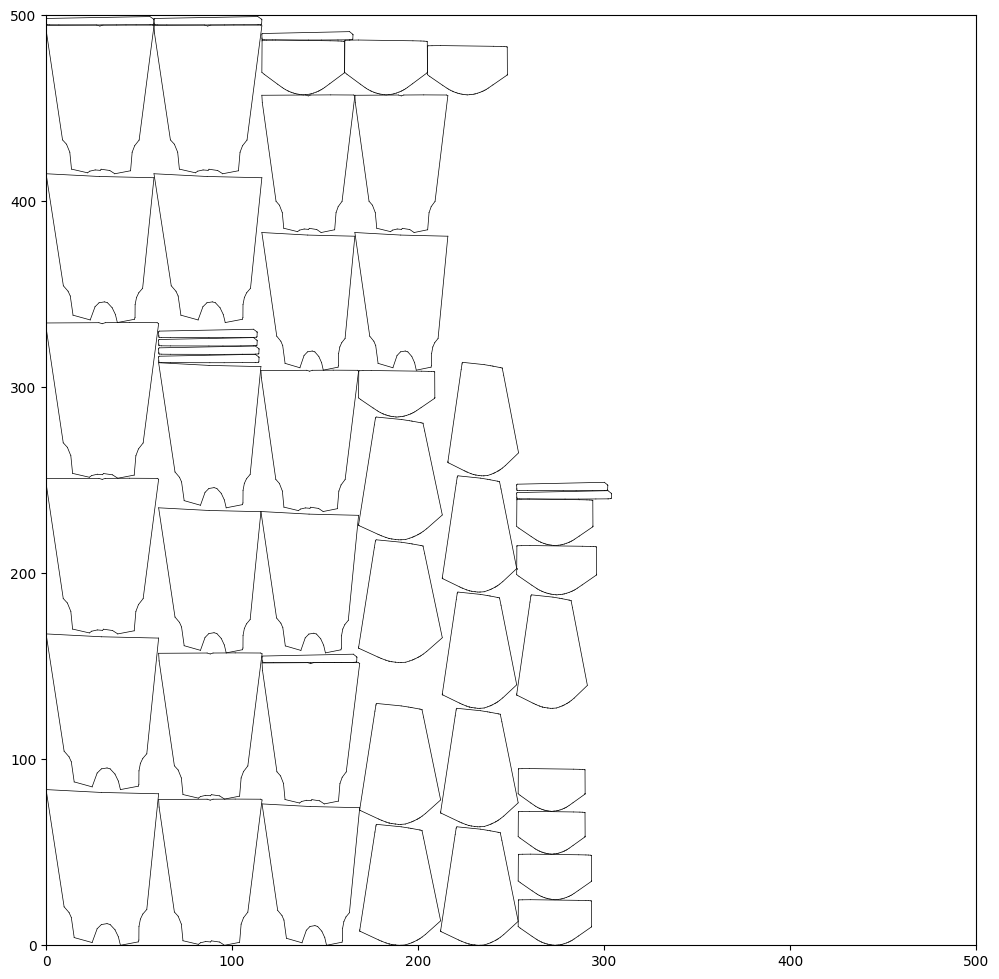

In [110]:
canvas_width = 500
canvas_height = 500

test_polys = flattened_list

sorted_test_polys = sort_polygons_by_bounding_box_area(test_polys)
positions = pack_bounding_boxes_with_rectpack(sorted_test_polys, canvas_width, canvas_height)
moved_polys = apply_positions_to_polygons(sorted_test_polys, positions)
render_polygons(moved_polys, canvas_width, canvas_height)